# Занятие 5. Линейная регрессия

**Цель данного занятия** состоит в освоении на практике линейной регрессии на примере задачи прогнозирования цены вина. 

Далее будем использовать датасет [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews), также его можно найти в [Лабораторной работе №0](https://lk.yandexdataschool.ru/teaching/assignments/2683/). 

Прочитайте только следующие колонки:

    country : страна производитель
    variety : сорт 
    winery : винодельня
    points : оценка экспертов
    price : цена за бутылку
    
и удалите все строки содержащие пропущенные значения:

In [70]:
import pandas as pd
import numpy as np
df = pd.read_csv("Wine Reviews.csv", usecols=["country",
    "variety",
    "winery",
    "points",
    "price"], ).dropna()

In [71]:
df.head()

,country,points,price,variety,winery
1,Portugal,87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Pinot Gris,Rainstorm
3,US,87,13.0,Riesling,St. Julian
4,US,87,65.0,Pinot Noir,Sweet Cheeks
5,Spain,87,15.0,Tempranillo-Merlot,Tandem


Далее мы будем учиться предсказывать стоимость вина, т.е. колонку `price`.

Выделем таргет в отдельный вектор и разобъём данные на `train` и `test`:

In [72]:
Y = df.price
X = df.drop(columns=["price"])

In [73]:
X.size + Y.size == df.size

True

In [74]:
for col in ["country",    "variety",    "winery",]:
    col_cts = X[col].value_counts()
    col_cts = col_cts[col_cts >= 10]
    X = X[X[col].isin(col_cts.index)]
Y = Y.loc[X.index]


In [80]:
split = X.shape[0] // 3

In [81]:
X_train, X_test, Y_train, Y_test = X[split:], X[:split], Y[split:], Y[:split]

## Метод наименьших квадратов

### Двумерный случай

Попытаемся найти функцию вида: 

$$f(x) = a + bx$$
    
, которая бы хорошо приближала цену, основываясь только на оценке эксперта.

Построим график зависимости цены от оценки:

<AxesSubplot:xlabel='points', ylabel='price'>

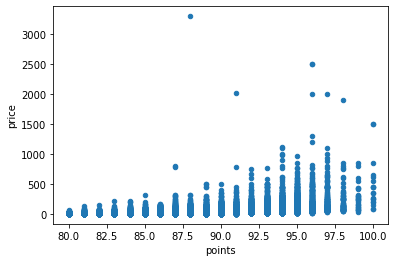

In [84]:
df.plot.scatter(x="points", y="price")

**Вопрос:** В чём суть метода наименьших квадратов? 

Выпишите формулы для вычисления параметров $a$ и $b$, 

а затем напишим класс `MLS`, который нужно отнаследовать от [sklearn.base.RegressorMixin](https://scikit-learn.org/stable/modules/generated/sklearn.base.RegressorMixin.html):

In [ ]:
class MLS2d ...
    ...

In [5]:
model_2d = MLS2d().fit(X_train['points'], Y_train)

print(f'a = {model_2d.a}')
print(f'b = {model_2d.b}')

a = -466.812668581132
b = 5.675216795743072


Вычислим среднию квадратическую ошибку:

In [6]:
Y_pred = model_2d.predict(X_test['points'])

MSE = ...

print(f'MSE: {MSE(Y_test, Y_pred)}')

MSE: 1125.6275430492763


Постройте получившеюся прямую поверх предыдущего графика зависимости цены от оценки:

## Многомерный случай

Мы можем использовать не только оценку экспертов для предсказания цены, но и, например, страну производителя.

Для этого нам нужно закодировать подобные признаки - будем использовать [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). 

Напишим класс, который бы наследовался от класса OneHotEncoder, но работал бы c таблицами и в качестве аргумента принемал также список колонок, которые требуется закодировать:

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [91]:
class PDEncoder(OneHotEncoder):
    def __init__(self, columns=None, **kwargs):
        self.columns = columns
        super().__init__(self, **kwargs)
        

    def preprocessing(self, X):
        if self.columns:
            X = X[self.columns]
        return X
    
    def fit(self, X):
        OneHotEncoder.fit(self, self.preprocessing(X))
        return self
    
    def transform(self, X):
        X_pre = self.preprocessing(X)
        vectors = OneHotEncoder.transform(self, X_pre).toarray()
        categories = np.concatenate(self.categories_)
        X_pre = pd.DataFrame(vectors, columns=categories, index=X_pre.index)
        X = X.loc[X_pre.index].drop(columns=self.columns).join(X_pre)
        return X

In [92]:
encoder = PDEncoder(columns=['country'])

X_train_ = encoder.fit_transform(X_train[['points', 'country']])
X_test_ = encoder.transform(X_test[['points', 'country']])

X_test_.head(3)

/Users/dimakoshman/.pyenv/versions/shad_env/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass categories=PDEncoder(columns=['country']) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


TypeError: object of type 'PDEncoder' has no len()

Выпишите формулы для многомерного случая, воспользовавшись матречным дифференцированием, 

а затем напишим, соответсвующий класс:

In [10]:
class MLS ...

In [11]:
model = MLS().fit(X_train[['points']], Y_train)

assert (model.W - np.array([model_2d.a, model_2d.b])).sum() < 10 ** -6

In [12]:
model = ...

Вычислим среднию квадратическую ошибку:

In [ ]:
Y_pred = ...

print(f'MSE: {MSE(Y_test, Y_pred)}')

**Вопрос:** Удалось ли повысить качество предсказания?

Построим модель без свободной переменной:

Обучите [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) и убедитесь в том, что получили сравнимое значение `MSE`:

In [94]:
from sklearn.linear_model import LinearRegression

In [96]:
one = OneHotEncoder()

In [112]:
X = one.fit_transform(X)

In [113]:
X_train, X_test, Y_train, Y_test = X[split:], X[:split], Y[split:], Y[:split]

In [114]:
reg = LinearRegression().fit(X_train, Y_train)

In [115]:
reg.predict(X_test)

array([ 9.30359094, 12.18192244, 28.51414043, ..., 29.51937137,
       15.75716441, 67.99226847])

In [102]:
import sklearn.metrics as met

In [116]:
met.mean_squared_error(reg.predict(X_test), Y_test)

749.4026421314

In [122]:
from sklearn.linear_model import Ridge

In [124]:
ridge = Ridge().fit(X_train, Y_train)

In [125]:
met.mean_squared_error(ridge.predict(X_test), Y_test)

749.6798294945245

**Вопрос:** Удалось ли теперь повысить качество предсказания? В чём была проблема?

Расширим ещё признаковое описание, добавив сорт винограда:

MSE: 58315.964960996505
Condition number: -9.482188024869054e+22


**Вопрос**: Удалось ли теперь повысить качество предсказания? В чём может быть проблема?

## Ридж-регрессия

Напишим класс:

In [19]:
class RR ...
    ...

In [ ]:
model = ...
Y_pred = ...

print(f'MSE: {MSE(Y_test, Y_pred)}')

Расширим ещё признаковое описание, добавив винодельню:

## SGD

Обучите [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) предсказывать значение цены по оценке с качеством не хуже, чем у `MLS`. 

Для этого вам нужно проделать ряд эксперементов и подобрать наилучшую стратегию обучения, используя [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Визуализируйте ваши эксперементы.

Обучите `SGD`, используя весь объём данных и постарайтесь выйграть в скоросте и качестве у `RR`